In [22]:
# Font
%matplotlib inline
import os.path
import matplotlib
import matplotlib.pyplot as plt
font = {'family': 'IPAexGothic'}
matplotlib.rc('font', **font)
markerSize = 12
fontSize = 22
figureSize = (12, 9)
bboxPos = (0.5, -0.1)

In [23]:
import numpy as np
import random
from mpl_toolkits.mplot3d import Axes3D
from numpy import linalg as LA

import pylab

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [24]:
# PNGとEPSファイルを書き出す
def writePNGandEPS(name):
    plt.savefig("%s/%s.png" % ('./images/', name))
    plt.savefig("%s/%s.eps" % ('./images/', name))

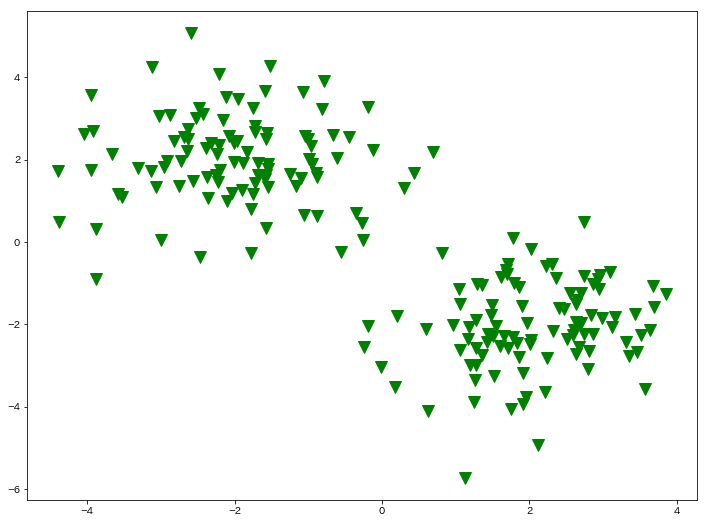

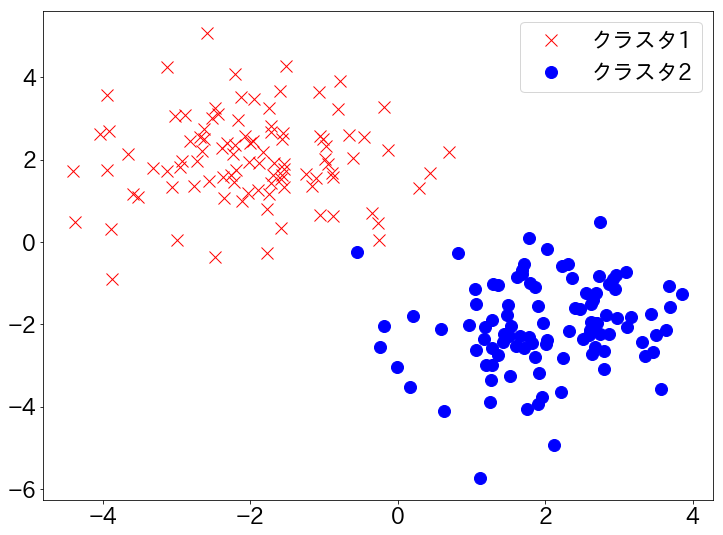

In [25]:
# 教師なし学習のサンプル
t = 2
pylab.figure(figsize=figureSize)
x1 = np.random.randn(2, 100) + np.array([[-t], [ t]])
x2 = np.random.randn(2, 100) + np.array([[ t], [-t]])
plt.plot(x1[0,:], x1[1,:], 'vg', markersize=markerSize)
plt.plot(x2[0,:], x2[1,:], 'vg', markersize=markerSize)
plt.legend()
plt.rcParams["font.size"] = fontSize
writePNGandEPS('nonteach01')
plt.show()

pylab.figure(figsize=figureSize)
plt.plot(x1[0,:], x1[1,:], 'xr', label=u'クラスタ1', markersize=markerSize)
plt.plot(x2[0,:], x2[1,:], 'ob', label=u'クラスタ2', markersize=markerSize)
plt.legend()
plt.rcParams["font.size"] = fontSize
writePNGandEPS('nonteach02')
plt.show()


In [26]:
# 正弦波をノイズありで生成する
numberOfLearningData = 20
numberOfTestData = 20
numberOfData = numberOfLearningData + numberOfTestData

useCache = True

# 学習データ
if (os.path.exists('./cache/learningX.npy') and useCache):
    learningX = np.load('./cache/learningX.npy')
else:
    learningX = np.sort(np.random.random(size=numberOfLearningData) * 24).reshape(-1, 1)
    np.save('./cache/learningX.npy', learningX)
if (os.path.exists('./cache/learningY.npy') and useCache):
    learningY = np.load('./cache/learningY.npy')
else:
    learningY = np.sin(learningX/24*2*np.pi) + np.random.normal(0, 0.1, (numberOfLearningData, 1))
    np.save('./cache/learningY.npy', learningY)

# テストデータ
if not(os.path.exists('./cache/testX.npy') and useCache):
    testX = np.load('.cache//testX.npy')
else:
    testX = np.sort(np.random.random(size=numberOfTestData) * 24).reshape(-1, 1)
    np.save('./cache/testX.npy', testX)
if (os.path.exists('./cache/testY.npy') and useCache):
    testY = np.load('./cache/testY.npy')
else:
    testY = np.sin(testX/24*2*np.pi) + np.random.normal(0, 0.1, (numberOfTestData, 1))
    np.save('./cache/testY.npy', testY)

# まとめたデータ
allX = np.concatenate((learningX, testX))
allY = np.concatenate((learningY, testY))

# 真値
trueX = np.arange(0, 24, 0.1)
trueY = np.sin(trueX/24*2*np.pi)

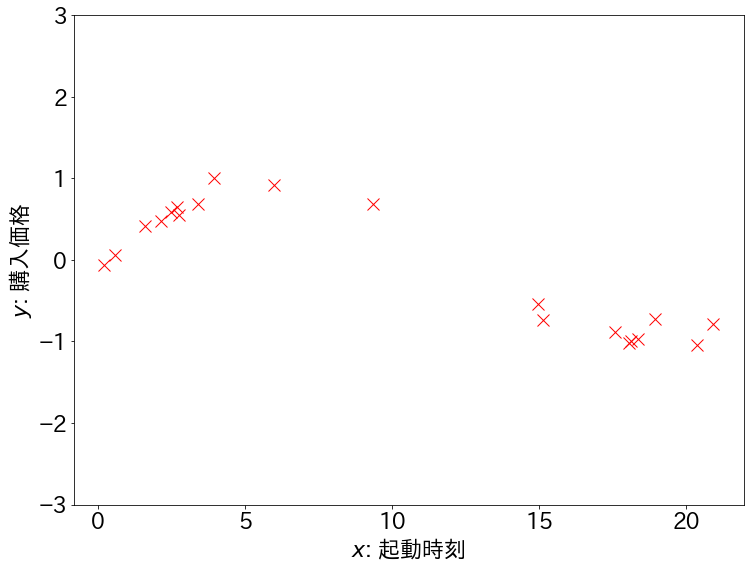

In [27]:
## 学習データのみ
pylab.figure(figsize=figureSize)
plt.plot(learningX, learningY, 'rx', markersize=markerSize)
plt.xlabel(u'$x$: 起動時刻');
plt.ylabel(u'$y$: 購入価格');
plt.ylim(-3, 3)
plt.rcParams["font.size"] = fontSize
writePNGandEPS('learningData')
plt.show()

In [28]:
# すべてのデータで回帰する
# 線形回帰モデルで学習
# 基底関数をdegree次にする
def learnAndPlot(dataX, dataY, x, degree):
    reg = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())
    ])
    reg.fit(np.transpose(dataX.reshape(1, -1)), dataY)
    
    # # 学習したパラメータの学習性能を評価する
    inferenceY = reg.predict(learningX.reshape(-1, 1))
    error2Norm = LA.norm(learningY - inferenceY, 2)
    print(error2Norm)

    # # 学習したパラメータの汎化性能を評価する
    inferenceY = reg.predict(testX.reshape(-1, 1))
    error2Norm = LA.norm(testY - inferenceY, 2)
    print(error2Norm)
    
    # プロット
    inferenceY = reg.predict(x.reshape(-1, 1))
    pylab.figure(figsize=figureSize)
    plt.plot(dataX, dataY, 'rx', label=u'学習データ', markersize=markerSize)
    plt.plot(x, inferenceY, 'g-', label=u'推論結果', markersize=markerSize)
    plt.legend()
    plt.xlabel('$x$'); plt.ylabel('$y$')
    plt.ylim(-3, 3)
    plt.rcParams["font.size"] = fontSize
    writePNGandEPS('learnAndPlot-%d' % degree)
    plt.show()

1.66467613912
2.34058281655


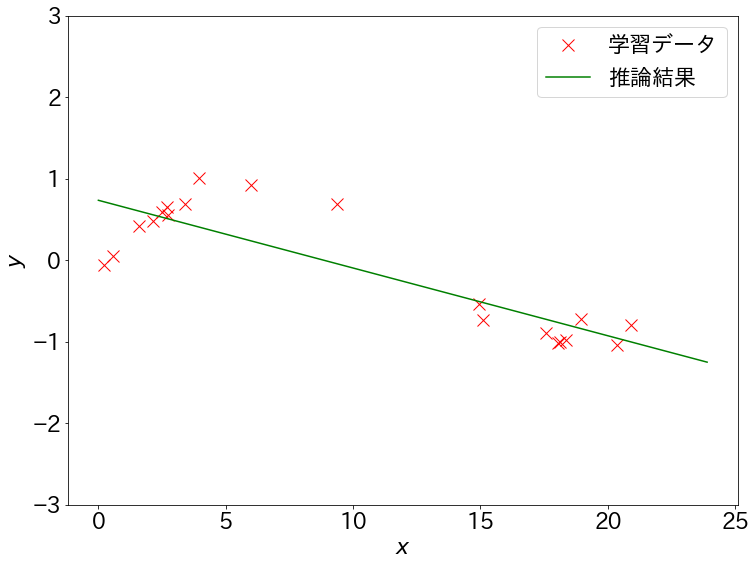

In [29]:
learnAndPlot(learningX, learningY, trueX, 1)

1.34709372981
3.25602794985


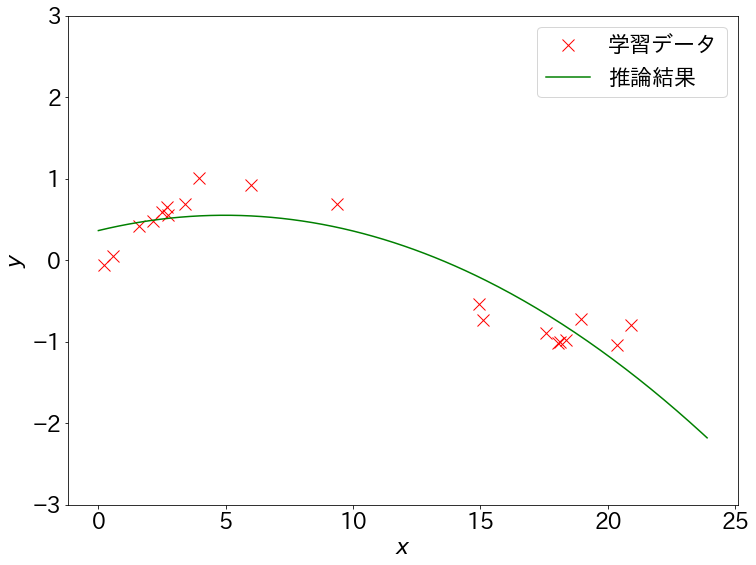

In [30]:
learnAndPlot(learningX, learningY, trueX, 2)

0.426353117917
2.09002435082


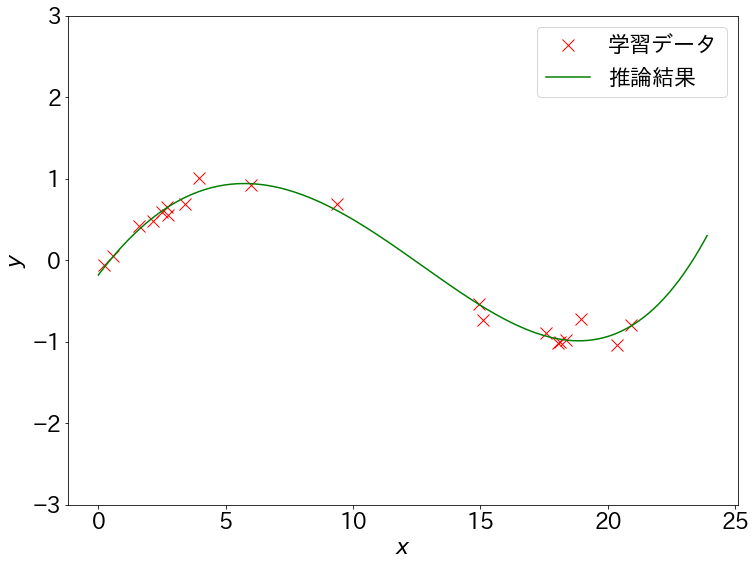

In [31]:
learnAndPlot(learningX, learningY, trueX, 4)

0.312630123219
15.4932813066


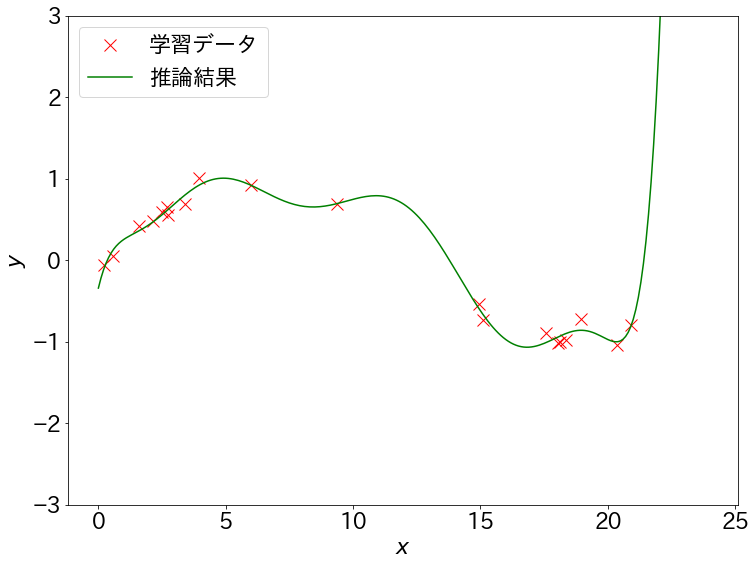

In [32]:
learnAndPlot(learningX, learningY, trueX, 9)

0.936310210826
61.5432936389


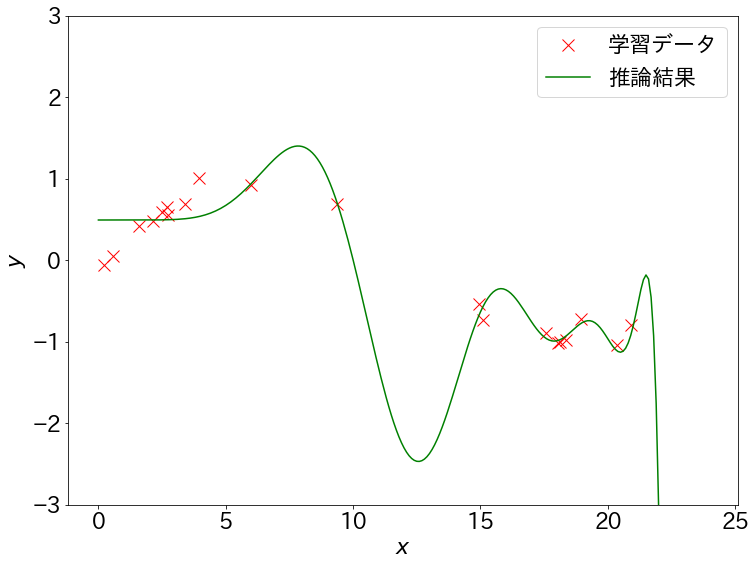

In [33]:
learnAndPlot(learningX, learningY, trueX, 16)

In [34]:
# 汎化性能を検証する
# 基底関数をdegree次にする
def evaluateGlobalAbility(learningX, inferenceY, testX, testY, x, degree):
    reg = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())
    ])
    reg.fit(np.transpose(learningX.reshape(1, -1)), learningY)

    # # 学習したパラメータの学習性能を評価する
    inferenceY = reg.predict(learningX.reshape(-1, 1))
    error2Norm = LA.norm(learningY - inferenceY, 2)
    print(error2Norm)

    # # 学習したパラメータの汎化性能を評価する
    inferenceY = reg.predict(testX.reshape(-1, 1))
    error2Norm = LA.norm(testY - inferenceY, 2)
    print(error2Norm)

    # プロット
    pylab.figure(figsize=figureSize)
    inferenceY = reg.predict(trueX.reshape(-1, 1))
    plt.plot(learningX, learningY, 'rx', label=u'学習データ', markersize=markerSize)
    plt.plot(testX, testY, 'bo', label=u'テストデータ', markersize=markerSize)
    plt.plot(trueX, inferenceY, 'g-', label=u'推論結果')
    plt.legend()
    plt.xlabel('$x$'); plt.ylabel('$y$')
    plt.ylim(-3, 3)
    plt.rcParams["font.size"] = fontSize
    writePNGandEPS('generalization-ability-%d' % degree)
    plt.show()

1.66467613912
2.34058281655


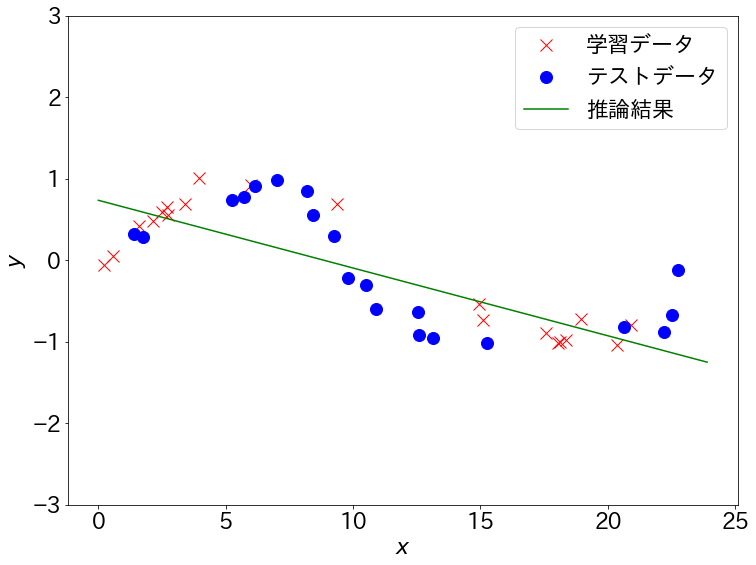

In [35]:
evaluateGlobalAbility(learningX, learningY, testX, testY, trueX, 1)

1.34709372981
3.25602794985


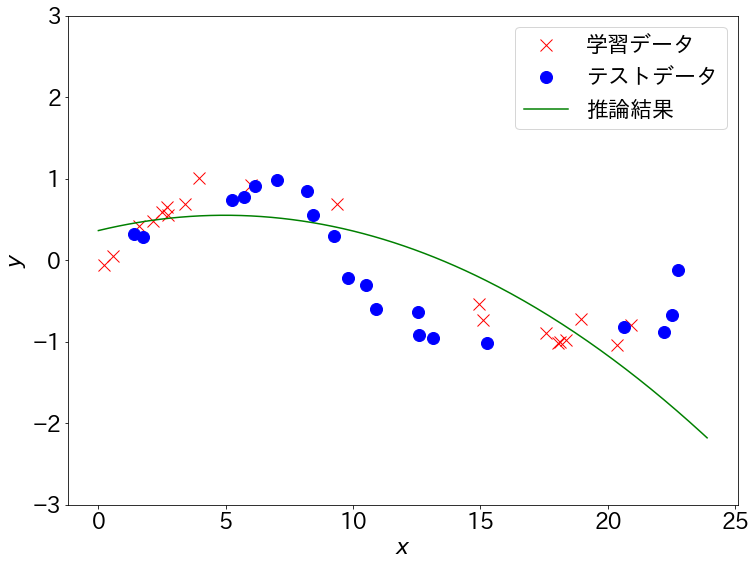

In [36]:
evaluateGlobalAbility(learningX, learningY, testX, testY, trueX, 2)

0.426353117917
2.09002435082


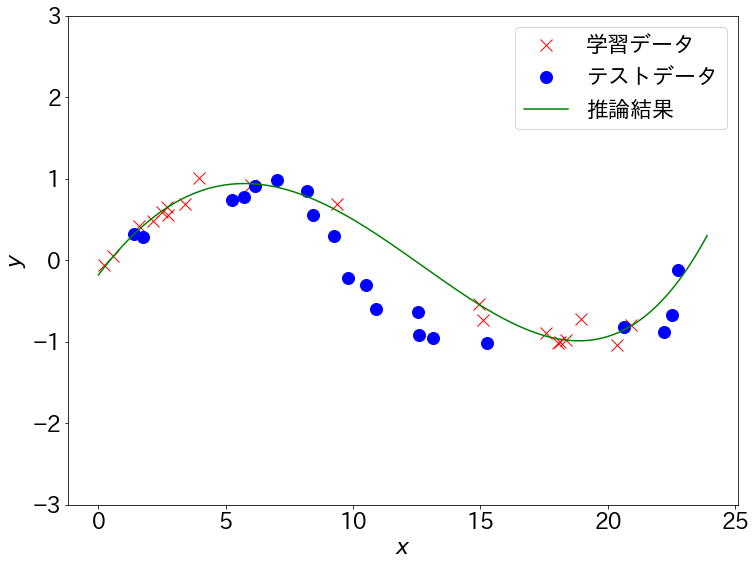

In [37]:
evaluateGlobalAbility(learningX, learningY, testX, testY, trueX, 4)

0.312630123219
15.4932813066


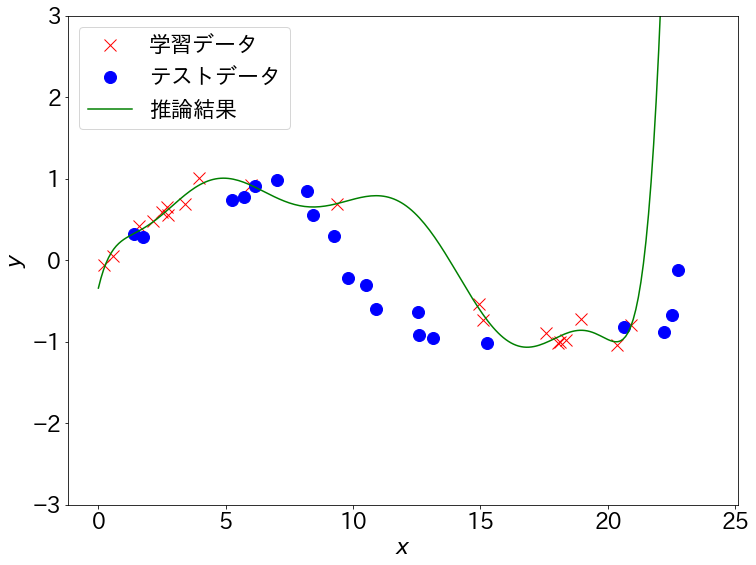

In [38]:
evaluateGlobalAbility(learningX, learningY, testX, testY, trueX, 9)

0.936310210826
61.5432936408


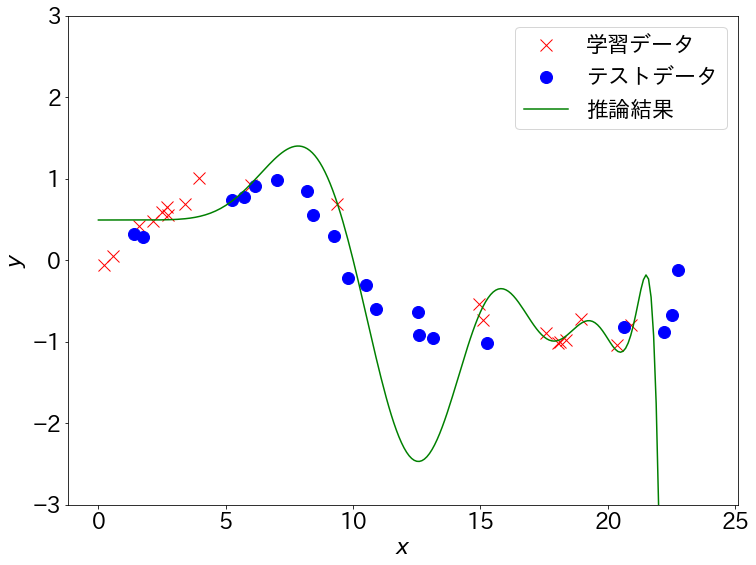

In [39]:
evaluateGlobalAbility(learningX, learningY, testX, testY, trueX, 16)

In [19]:
# 汎化性能を検証する
# 基底関数をdegree次にする
def evaluateGlobalAbility2(learningX, inferenceY, testX, testY, x, degree):
    reg = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())
    ])
    reg.fit(np.transpose(learningX.reshape(1, -1)), learningY)

    # # 学習したパラメータの学習性能を評価する
    inferenceY = reg.predict(learningX.reshape(-1, 1))
    error2Norm = LA.norm(learningY - inferenceY, 2)
    print(error2Norm)

    # # 学習したパラメータの汎化性能を評価する
    inferenceY = reg.predict(testX.reshape(-1, 1))
    error2Norm = LA.norm(testY - inferenceY, 2)
    print(error2Norm)
    
    # 真値
    _trueX = testX
    _trueY = np.sin(_trueX/24*2*np.pi)
    
    # プロット
    pylab.figure(figsize=figureSize)
    inferenceY = reg.predict(trueX.reshape(-1, 1))
    plt.plot(learningX, learningY, 'rx', label=u'学習データ', markersize=markerSize)
    plt.plot(testX, testY, 'bo', label=u'テストデータ', markersize=markerSize)
    plt.plot(trueX, inferenceY, 'g-', label=u'推論結果')
    
    # 推定値とテストデータの差分をレンダリング
    inferenceY = reg.predict(testX.reshape(-1, 1))
    for i in range(testX.shape[0]):
        plt.plot([testX[i,0], testX[i,0]], [testY[i, 0], inferenceY[i,0]], 'b-')
        
    y = reg.predict(learningX.reshape(-1, 1))
    for i in range(learningX.shape[0]):
        plt.plot([learningX[i,0], learningX[i,0]], [learningY[i, 0], y[i,0]], 'r--')
    
    plt.legend()
    plt.xlabel('$x$'); plt.ylabel('$y$')
    plt.ylim(-3, 3)
    plt.rcParams["font.size"] = fontSize
    writePNGandEPS('generalization-ability-diff-%d' % degree)
    plt.show()

1.66467613912
1.82878487661


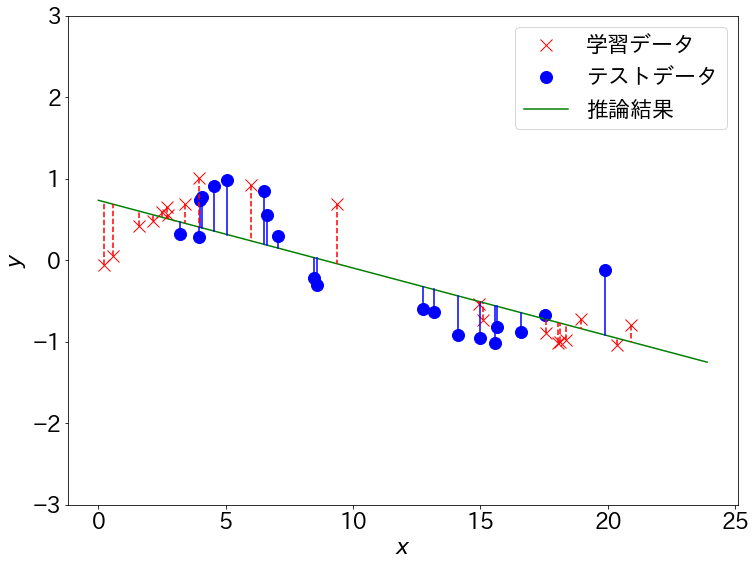

In [20]:
evaluateGlobalAbility2(learningX, learningY, testX, testY, trueX, 1)